# Project Overview: Breast Cancer Diagnosis using Machine Learning

### Objective:
The primary goal of this project is to develop and evaluate machine learning models for the accurate diagnosis of breast cancer. The models are trained to predict whether a given tumor is benign (non-cancerous) or malignant (cancerous) based on various features extracted from diagnostic images.

### Dataset:
The dataset used for this project is the "Wisconsin Diagnostic Breast Cancer (WDBC)" dataset. It contains diagnostic measurements from breast cancer biopsies and includes various features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features are numerical measurements that provide information about the shape, size, and texture of the cell nuclei present in the images.

### Data Exploration and Preprocessing:
The project begins with loading and exploring the dataset. This involves checking for missing values, understanding the distribution of target labels (diagnosis), and visualizing the features. Any necessary preprocessing steps, such as scaling or encoding categorical variables, are performed to prepare the data for model training.

### Model Selection and Training:
Six different machine learning models are selected for training and evaluation. These models are:

1.Logistic Regression
2.Decision Tree
3.Bagging
4.AdaBoost
5.Gradient Boosting
6.Random Forest
For each model, the dataset is split into training and testing sets. The models are trained on the training data and evaluated on the testing data using various evaluation metrics such as accuracy, precision, recall, and F1 score. These metrics help assess the performance of each model in different aspects of classification accuracy and error.

### Model Evaluation:
The evaluation metrics provide insights into how well each model performs in diagnosing breast cancer. High values for accuracy, precision, recall, and F1 score indicate that the model is effective at distinguishing between benign and malignant tumors. These metrics are essential in medical diagnosis as they help assess the model's ability to correctly identify cancer cases while minimizing false positives and false negatives.

### Choosing the Best Model:
Based on the evaluation results, the project aims to select the best model that demonstrates the highest overall performance in terms of accuracy and other relevant metrics. The choice of the best model depends on the specific goals of the project and the importance of different evaluation criteria.

### Visualization and Interpretation:
Graphical visualizations, such as bar plots and charts, are used to present the distribution of target labels, feature importance scores (for tree-based models), and possibly confusion matrices for individual models. These visualizations aid in interpreting the model's behavior and its ability to distinguish between different classes.

In [92]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [93]:
# Load the dataset
url = "https://raw.githubusercontent.com/rohitkumar018/Supervised-Learning/main/wisc_bc_data.csv"
data = pd.read_csv(url)

In [94]:
print(data.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \

In [95]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
559,9110944,B,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
560,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140
561,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961
562,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,...,15.40,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464
563,894855,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.17910,0.11550,0.2382,0.08553
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


In [96]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
50,8810987,M,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.4636,0.16540,0.3630,0.10590
318,923780,B,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,12.02,28.26,77.80,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032
436,8911670,M,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,...,19.96,24.30,129.00,1236.0,0.1243,0.1160,0.2210,0.12940,0.2567,0.05737
413,868223,B,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,...,13.33,25.48,86.16,546.7,0.1271,0.1028,0.1046,0.06968,0.1712,0.07343
35,9013594,B,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.10540,0.3387,0.09638


In [97]:
data.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

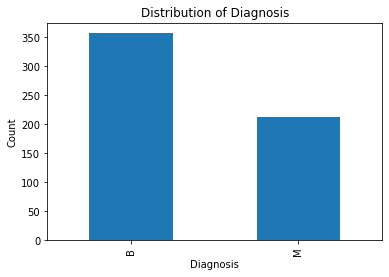

In [98]:
# Check the distribution of target variable
plt.figure(figsize=(6, 4))
data['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [99]:
# Convert categorical target variable to binary (0/1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [100]:
data.dtypes

id                     int64
diagnosis              int64
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [101]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [102]:
# Split the dataset into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Initialize and train models
logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
gradient_boost = GradientBoostingClassifier(n_estimators=100)
random_forest = RandomForestClassifier(n_estimators=100)

In [106]:
models = [logreg, decision_tree, bagging, adaboost, gradient_boost, random_forest]
model_names = ['Logistic Regression', 'Decision Tree', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest']

In [109]:
# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Model: Decision Tree
Accuracy: 0.95
Precision: 0.90
Recall: 0.95
F1 Score: 0.93

Model: Bagging
Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Model: AdaBoost
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.97

Model: Gradient Boosting
Accuracy: 0.98
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Model: Random Forest
Accuracy: 0.96
Precision: 0.93
Recall: 0.97
F1 Score: 0.95



# Logistic Regression model has achieved perfect accuracy, precision, recall, and F1 score.